In [2]:
import pandas as pd 

In [3]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
loan_data=pd.read_csv('loan_data.csv')

In [5]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
loan_data.shape

(9578, 14)

In [7]:
loan_data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [9]:
# target column = not fully paid 


In [10]:
loan_data['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

# EXPLOARTORY DATA ANALYSIS

<Axes: xlabel='not.fully.paid', ylabel='count'>

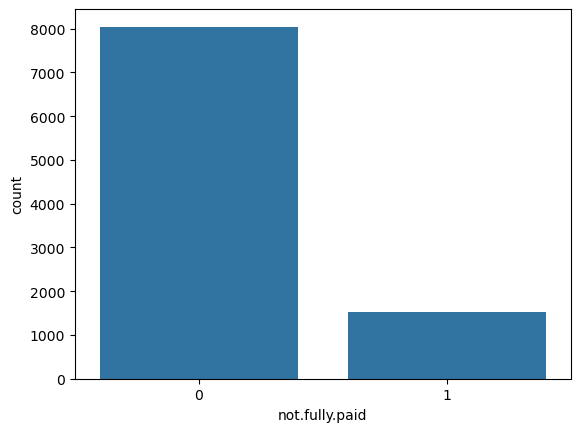

In [12]:
sns.countplot(x=loan_data['not.fully.paid'])

<Axes: xlabel='purpose', ylabel='count'>

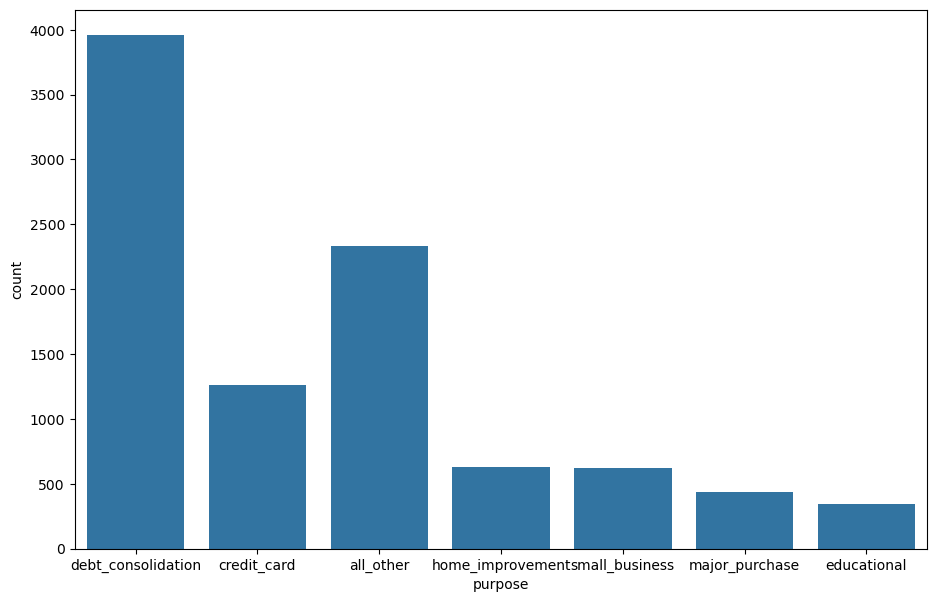

In [13]:
# see the purpose 
plt.figure(figsize=(11,7))
sns.countplot (x=loan_data['purpose'])


<Axes: xlabel='purpose', ylabel='count'>

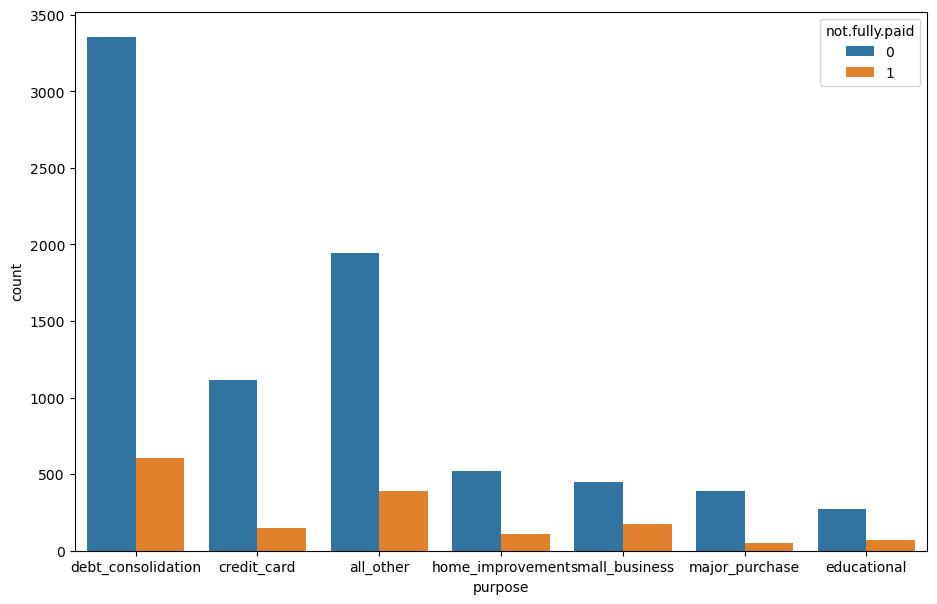

In [14]:
# see the purpose 
plt.figure(figsize=(11,7))
sns.countplot (x='purpose',hue='not.fully.paid',data=loan_data)


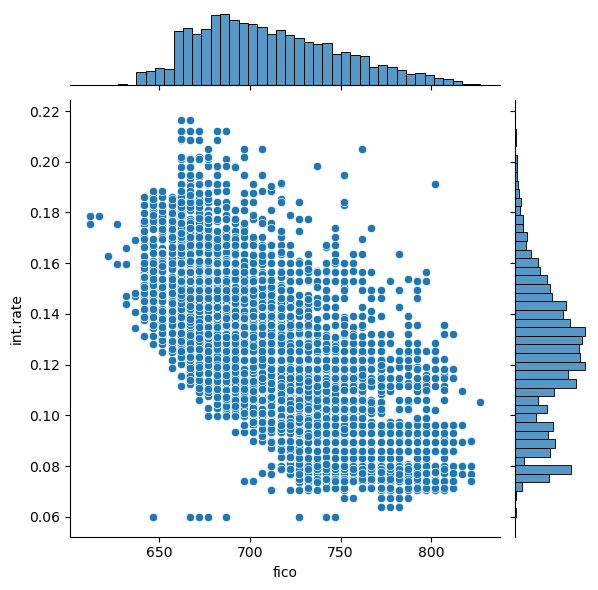

In [15]:
# relationship between fico and interest rate 
sns.jointplot(x='fico',y='int.rate',data=loan_data)

In [16]:
loan_data.corr(numeric_only=True)


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


In [17]:
loan_data['purpose']


0       debt_consolidation
1              credit_card
2       debt_consolidation
3       debt_consolidation
4              credit_card
               ...        
9573             all_other
9574             all_other
9575    debt_consolidation
9576      home_improvement
9577    debt_consolidation
Name: purpose, Length: 9578, dtype: object

# feature engineering 
1. handling of imbalanced data set
2. (0 class is very high and 1 class is very less )

In [19]:
loan_data['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

In [20]:
fully_paid=loan_data[loan_data['not.fully.paid']==0]

In [21]:
not_fully_paid_1=loan_data[loan_data['not.fully.paid']==1]

In [22]:
fully_paid.shape

(8045, 14)

In [23]:
from sklearn.utils import resample 
df_minor_upsample=resample(not_fully_paid_1,replace=True,n_samples=8045)

In [24]:
df_minor_upsample.shape

(8045, 14)

In [25]:
new_df=pd.concat([fully_paid,df_minor_upsample])

In [26]:
new_df.shape

(16090, 14)

In [27]:
# shuffle data 
from sklearn.utils import shuffle

In [28]:
new_df=shuffle(new_df)

In [29]:
new_df['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    8045
Name: count, dtype: int64

In [30]:
new_df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

# feature tranformation

In [32]:
# convert categorical data into numerical data 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [33]:
for i in new_df.columns:
    if new_df[i].dtypes=='object':
        new_df[i]=le.fit_transform(new_df[i])

In [34]:
new_df.dtypes

credit.policy          int64
purpose                int64
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [35]:
new_df.corr()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,0.022392,-0.290993,0.056014,0.023856,-0.089275,0.374861,0.099935,-0.182104,-0.099988,-0.543974,-0.058199,-0.063911,-0.195903
purpose,0.022392,1.000000,0.141885,0.199678,0.119053,-0.042164,0.065036,0.060039,0.053966,-0.067383,0.041864,0.006875,0.008070,0.061103
int.rate,-0.290993,0.141885,1.000000,0.269707,0.078078,0.202623,-0.685483,-0.113995,0.071305,0.417052,0.183272,0.143971,0.110397,0.219587
installment,0.056014,0.199678,0.269707,1.000000,0.473147,0.032215,0.101673,0.177644,0.245803,0.048425,-0.010748,-0.007796,-0.021047,0.071750
log.annual.inc,0.023856,0.119053,0.078078,0.473147,1.000000,-0.032709,0.103143,0.346615,0.397200,0.080435,0.035060,0.017660,0.018869,-0.038068
dti,-0.089275,-0.042164,0.202623,0.032215,-0.032709,1.000000,-0.217013,0.091781,0.170889,0.326042,0.013548,-0.034703,0.021316,0.044894
fico,0.374861,0.065036,-0.685483,0.101673,0.103143,-0.217013,1.000000,0.261972,0.013376,-0.504370,-0.183633,-0.205177,-0.157632,-0.211390
days.with.cr.line,0.099935,0.060039,-0.113995,0.177644,0.346615,0.091781,0.261972,1.000000,0.262216,0.004140,-0.017063,0.077688,0.073754,-0.043416
revol.bal,-0.182104,0.053966,0.071305,0.245803,0.397200,0.170889,0.013376,0.262216,1.000000,0.170275,0.027020,-0.032462,-0.037710,0.055266
revol.util,-0.099988,-0.067383,0.417052,0.048425,0.080435,0.326042,-0.504370,0.004140,0.170275,1.000000,-0.027791,-0.059467,0.080226,0.111907


<Axes: >

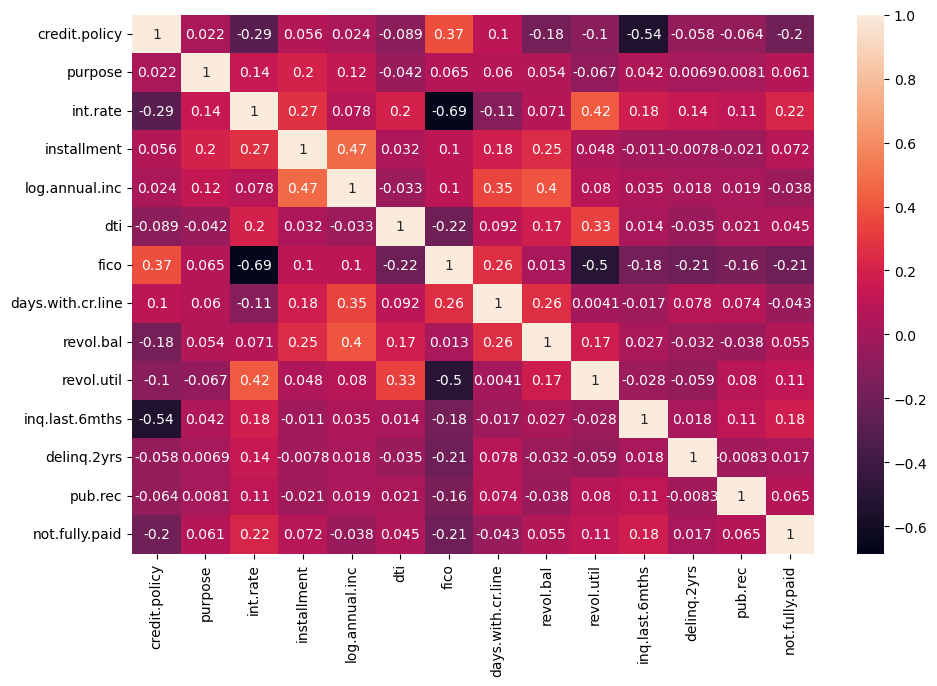

In [36]:
plt.figure(figsize=(11,7))
sns.heatmap(new_df.corr(),annot=True)

In [37]:
# see the sorted results 

In [38]:
new_df.corr().abs()['not.fully.paid'].sort_values(ascending=False )

not.fully.paid       1.000000
int.rate             0.219587
fico                 0.211390
credit.policy        0.195903
inq.last.6mths       0.177772
revol.util           0.111907
installment          0.071750
pub.rec              0.064982
purpose              0.061103
revol.bal            0.055266
dti                  0.044894
days.with.cr.line    0.043416
log.annual.inc       0.038068
delinq.2yrs          0.017404
Name: not.fully.paid, dtype: float64

In [39]:
#select columns according to the correlations 
x = new_df.loc[:, new_df.corr().abs()['not.fully.paid'].sort_values(ascending=False) >= 0.06]


In [40]:
x.corr().abs()['not.fully.paid'].sort_values(ascending=False)

not.fully.paid    1.000000
int.rate          0.219587
fico              0.211390
credit.policy     0.195903
inq.last.6mths    0.177772
revol.util        0.111907
installment       0.071750
pub.rec           0.064982
purpose           0.061103
Name: not.fully.paid, dtype: float64

In [41]:
x.shape

(16090, 9)

In [42]:
y=new_df['not.fully.paid']

In [43]:
y

8750    0
8752    1
9239    0
8800    1
5790    1
       ..
5608    1
8082    1
8911    0
8863    1
2973    0
Name: not.fully.paid, Length: 16090, dtype: int64

In [44]:
# split the data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
x_train.shape

(12872, 9)

In [46]:
x_test.shape

(3218, 9)

In [47]:
x_train

,credit.policy,purpose,int.rate,installment,fico,revol.util,inq.last.6mths,pub.rec,not.fully.paid
3480,1,4,0.1442,268.19,667,56.3,1,0,0
5870,1,6,0.1531,522.23,727,79.2,3,0,1
7251,1,2,0.1311,539.92,707,70.1,0,0,0
8877,0,6,0.1253,138.89,677,54.4,1,0,1
2532,1,4,0.1411,222.49,767,34.5,1,0,1
...,...,...,...,...,...,...,...,...,...
1774,1,6,0.1126,326.99,717,28.5,2,0,1
1907,1,0,0.0963,208.62,727,14.2,3,0,0
9576,0,4,0.1600,351.58,692,3.2,5,0,1
1683,1,1,0.1746,897.06,662,80.6,3,0,1


In [48]:
# apply standard scaling 
from sklearn.preprocessing import StandardScaler

In [49]:
sc=StandardScaler()

In [50]:
x_train=sc.fit_transform(x_train)

In [51]:
x_test=sc.fit_transform(x_test)

In [52]:
x_train

array([[ 0.57902479,  1.11276859,  0.66062263, ..., -0.34977025,
        -0.26803985, -1.00311236],
       [ 0.57902479,  2.2365374 ,  0.99289374, ...,  0.44483665,
        -0.26803985,  0.99689729],
       [ 0.57902479, -0.01100022,  0.17154942, ..., -0.7470737 ,
        -0.26803985, -1.00311236],
       ...,
       [-1.72704177,  1.11276859,  1.25049718, ...,  1.23944355,
        -0.26803985,  0.99689729],
       [ 0.57902479, -0.57288463,  1.79557114, ...,  0.44483665,
        -0.26803985,  0.99689729],
       [-1.72704177, -1.13476904,  2.10544195, ..., -0.34977025,
        -0.26803985,  0.99689729]])

# create dl model with keras and tensor flow 

In [54]:
from tensorflow.keras.models import Sequential

In [55]:
from tensorflow.keras.layers import Dense,Dropout


In [56]:
from tensorflow.keras.callbacks import EarlyStopping

In [57]:
# create architechture 
model=Sequential()

In [58]:
model.add(Dense(19,activation='relu',input_shape=[9]))
model.add(Dropout(0.20))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.20))

In [60]:
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.20))

In [61]:
# output layer 
model.add(Dense(1,activation='sigmoid'))

In [62]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 19)             │           190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 19)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 511 (2.00 KB)

 Trainable params: 511 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [64]:
early_stop=EarlyStopping(monitor='val_loss',
                        min_delta=0.001,
                        mode='min',
                        patience=10,
                        verbose=1)

In [65]:
# fit the model 
history=model.fit(x_train,y_train,
                  epochs=50,
                  batch_size=256,
                  validation_data=(x_test,y_test),
                  callbacks=[early_stop])

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5957 - loss: 0.6467 - val_accuracy: 0.7834 - val_loss: 0.5126
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.7868 - loss: 0.5091 - val_accuracy: 0.9773 - val_loss: 0.3188
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.9295 - loss: 0.3343 - val_accuracy: 0.9997 - val_loss: 0.1454
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.9702 - loss: 0.1859 - val_accuracy: 1.0000 - val_loss: 0.0564
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.9865 - loss: 0.1034 - val_accuracy: 1.0000 - val_loss: 0.0198
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.9901 - loss: 0.0635 - val_accuracy: 1.0000 - val_loss: 0.0065
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.9945 - loss: 0.0365 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.9958 - loss: 0.0240 - val_accuracy: 1.00

In [136]:
# evaluate 
model.evaluate(x_test,y_test)

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - accuracy: 1.0000 - loss: 1.5866e-06


[1.5703486724305549e-06, 1.0]

In [138]:
# predict

In [142]:
y_pred=model.predict(x_test)

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


In [144]:
y_pred

array([[3.1922714e-10],
       [9.9999589e-01],
       [3.4741324e-10],
       ...,
       [9.9999905e-01],
       [4.8372091e-11],
       [4.6079680e-07]], dtype=float32)

In [146]:
predictions=(y_pred>.5).astype(int)

In [148]:
predictions

array([[0],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [150]:
y_test

3358    0
1106    1
3320    0
6048    0
4777    0
       ..
9163    0
1686    1
9316    1
1011    0
9025    0
Name: not.fully.paid, Length: 3218, dtype: int64

In [154]:
from sklearn.metrics import accuracy_score ,classification_report

In [158]:
accuracy_score(predictions,y_test)

1.0

In [160]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1629
           1       1.00      1.00      1.00      1589

    accuracy                           1.00      3218
   macro avg       1.00      1.00      1.00      3218
weighted avg       1.00      1.00      1.00      3218



In [162]:
# save the model 
model.save('loan_default1.h5')
print('model is saved')

model is saved


# model number 2 

In [167]:
from tensorflow.keras.layers import BatchNormalization

In [173]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
# create architechture 
model1=Sequential()
model1.add(Dense(19,activation='relu',input_shape=[9]))
model1.add(BatchNormalization())
model1.add(Dropout(0.20))
model1.add(Dense(10,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.20))
model1.add(Dense(10,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.20))
model1.add(Dense(1,activation='sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [177]:
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 19)             │           190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 19)             │            76 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 19)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 667 (2.61 KB)

 Trainable params: 589 (2.30 KB)

 Non-trainable params: 78 (312.00 B)

In [189]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [193]:
history1=model1.fit(x_train,y_train,
                    epochs=100,
                    batch_size=256,
                    validation_data=(x_test,y_test))

Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6061 - loss: 0.7122 - val_accuracy: 0.9111 - val_loss: 0.5741
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.8347 - loss: 0.4135 - val_accuracy: 0.9866 - val_loss: 0.3129
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.9227 - loss: 0.2488 - val_accuracy: 0.9978 - val_loss: 0.1303
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.9627 - loss: 0.1526 - val_accuracy: 0.9994 - val_loss: 0.0538
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.9827 - loss: 0.0953 - val_accuracy: 1.0000 - val_loss: 0.0256
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.9902 - loss: 0.0648 - val_accuracy: 1.0000 - val_loss: 0.0139
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.9924 - loss: 0.0480 - val_accuracy: 1.0000 - val_loss: 0.0089
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.9959 - loss: 0.0358 - val_accura

In [199]:
model1.evaluate(x_test,y_test)

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 1.0000 - loss: 1.1118e-06


[1.1019410521839745e-06, 1.0]

In [201]:
model1.evaluate(x_train,y_train)

403/403 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 1.0000 - loss: 1.0472e-06


[1.0519692068555742e-06, 1.0]

In [203]:
# hyper parameter tuning 
# keras - keras tuner 

In [205]:
! pip instal keras-tuner

ERROR: unknown command "instal" - maybe you meant "install"


In [207]:
!pip install keras-tuner

In [209]:
import keras_tuner as kt 
import tensorflow